---
# AERO 5 - Hands on Machine Learning for cybersecurity (2023/2024)

# 1– Introduction, technical requirements
---

This lab session is an introduction to some basic Machine Learning notions in order to discuss how to set up a Machine Learning environment where we will do the entire coding for the rest of chapters.

## 1. Generating Text unisng Markov Chain

Markov chains are stochastic models in which a system can exist in a numer of states. In this exercise, we discover how to generate text using Markov chains. 

1. Start by importing the relevant python packages : the `pandas` will be used to enable data frame capabilities, the `scikit-learn` package will be used to divide the data into training and testing datasets. Import also `markovify`librairy that simplifies the process of building and using Markov chain models for text generation.

In [2]:
# EDIT THIS CELL
# ====================== Your code here =================
import pandas as pd
from sklearn.model_selection import train_test_split
import markovify
# =======================================================

2. Load the data `airport_reviews.csv` then analyze it. 

In [3]:
# EDIT THIS CELL
# ====================== Your code here =================
df = pd.read_csv("C:\\Users\\Public\\Documents\\IPSA\\COURS\\S9\\Deep Learning\\ML_CYB\\Lab_session_1\\Lab_session_1\\airport_reviews.csv")

# shows the shape of dataset
print(f'\033[1m{"-----DATAFRAME-SHAPE-----"}\033[0m \n{df.shape} \n')

# shows the deatures type
print(f'\033[1m{"-----FEATURES-TYPE-----"}\033[0m \n{df.dtypes}')

df
# =======================================================

-----DATAFRAME-SHAPE----- 
(2959, 1) 

-----FEATURES-TYPE----- 
content    object
dtype: object


,content
0,The airport is certainly tiny! Arriving there ...
1,Small airports are generally intimate friendly...
2,Waited an hour in a corridor for baggage but o...
3,The previous comment is so off the mark it mus...
4,The airport resulbles a shack. A very bad cafe...
...,...
2954,A bit remote for public transport but easy acc...
2955,The airport itself is quite nice enough but th...
2956,The airport itself is quite nice enough but th...
2957,Departed and arrived at HAM for a day trip to ...


We join the individual reviews into one large string and build a Markov chain model using the airport review text. The library will then compute the transition word probabilities from text. 

In [4]:
from itertools import chain
N=100
review_subset=df["content"][0:N] #data contains the imported dataset
#text="".join(chain_iterable(review_subset))
text="".join(chain(review_subset))
markov_chain_model=markovify.Text(text)

2. Generate five sentences using the Markov chain model and anaylze the output.

In [5]:
# EDIT THIS CELL
# ====================== Your code here =================
for i in range(5):
    sentence = markov_chain_model.make_sentence()
    print(f"Sentence {i + 1}: {sentence}")
# =======================================================

Sentence 1: Apart from a short walk if it has to spend 3 hours to get around and walking distances were short.
Sentence 2: No one directing people to use alternate at far end of terminal where there was good where I have had no problems with luggage on any of my father.
Sentence 3: There are no toilets in the shops.Cool modern design and lots of shops which I didn't useBucharest airport serves it's purpose but it's nothing too exciting.
Sentence 4: Landed from MXP in terminal B long walk through concourse B and with sometimes long queues.
Sentence 5: Having said that for a car to come in and just as honest taxis but they either have to wait in a gymI use Brussels National insteade.This is an inefficient process.


3. Generate now three sentences with a length no more than 140 characters, then analyze the output.

In [6]:
# EDIT THIS CELL
# ====================== Your code here =================
for i in range(3):
    sentence = markov_chain_model.make_short_sentence(140)
    print(f"Sentence {i + 1}: {sentence}")
# =======================================================

Sentence 1: Why do something that would add to the gate because ground staff are next to useless the design of the time you get ripped off.
Sentence 2: Overall Otopeni is a small airport quite modern.
Sentence 3: The guard in charge clearly did not receive luggage to be unloaded on arrival but otherwise a very short period.


## 2. Time series 

Time series can be very powerful for predecting cyberattacks. In this execise, we wil demonstrate several methods for making using time series data. 

1. Start by generating a time series. Then plot your data.

In [7]:
# EDIT THIS CELL
# ====================== Your code here =================
"""import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate time series data with a trend and noise
time = np.arange(0, 100, 1)
trend = 0.5 * time - 0.05 * time**2
noise = np.random.normal(scale=5, size=len(time))  # random noise
data = noise + trend

# Create a DataFrame
dftime = pd.DataFrame({'Time': time, 'Value': data})

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dftime['Time'], dftime['Value'], label='Time Series with Trend and Noise', color='blue')
plt.title('Synthetic Time Series Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()"""

# Generate a simple time series
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2023-12-31', freq='w')
time_series_data = np.random.randn(len(date_rng))

# Create a linear trend
trend = np.linspace(0, 10, len(date_rng))

# Combine the trend with the time series data
trendy_time_series_data = time_series_data + trend**2

# Create a DataFrame with the time series data and date index
dftime = pd.DataFrame(data={'value': trendy_time_series_data}, index=date_rng)

# Plot the time series data with the trend
plt.figure(figsize=(10, 6))
plt.plot(dftime.index, dftime['value'], label='Time Series Data with Trend')
plt.plot(dftime.index, trend**2, label='Trend', linestyle='--', color='orange')
plt.title('Generated Time Series Data with Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
# =======================================================

NameError: name 'np' is not defined

There is a large variety of techniques that we can use to predict the consequent value of a time series. Such as the autoregression (AR), the moving average (MA) and the simple exponential smoothing (SES).Train those three different models and compare the different resulting predictions.   

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


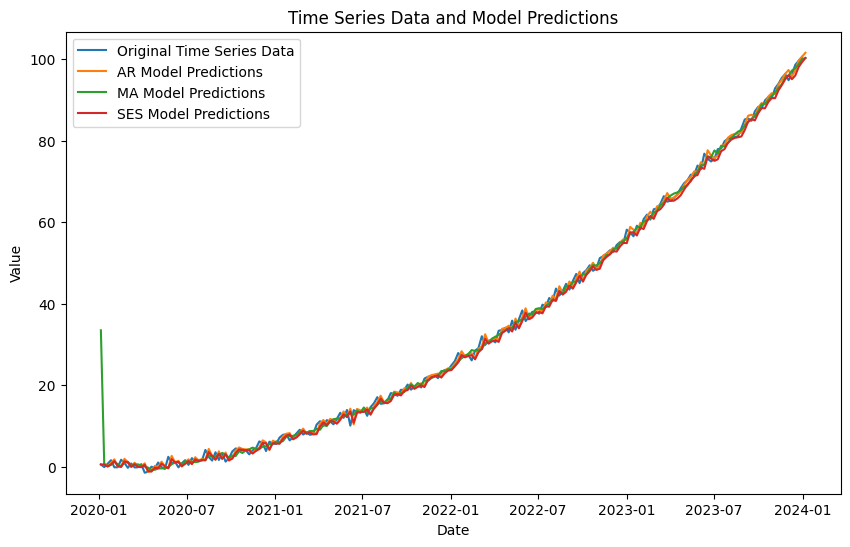

In [ ]:
# EDIT THIS CELL
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# ====================== Your code here =================
"""
# Generate synthetic time series data
np.random.seed(42)
time = np.arange(0, 100, 1)
trend = 0.5 * time
noise = np.random.normal(scale=5, size=len(time))
data = trend + noise

# Create a DataFrame with the name dftime
dftime = pd.DataFrame({'Time': time, 'Value': data})

# Split the data into training and testing sets
train_size = int(len(dftime) * 0.8)
train, test = dftime[:train_size], dftime[train_size:]

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(dftime['Time'], dftime['Value'], label='Original Time Series', color='blue')
plt.title('Synthetic Time Series Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Autoregression (AR) model
ar_model = AutoReg(train['Value'], lags=1)
ar_result = ar_model.fit()
ar_predictions = ar_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Moving Average (MA) model
ma_model = ARIMA(train['Value'], order=(0, 0, 1))
ma_result = ma_model.fit()
ma_predictions = ma_result.get_forecast(steps=len(test)).predicted_mean

# Exponential Smoothing (Holt-Winters) model
hw_model = ExponentialSmoothing(train['Value'], seasonal='add', seasonal_periods=4)
hw_result = hw_model.fit()
hw_predictions = hw_result.predict(start=len(train), end=len(train) + len(test) - 1)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train['Time'], train['Value'], label='Training Data', color='blue')
plt.plot(test['Time'], test['Value'], label='True Test Data', color='green')

# Autoregression (AR) predictions
plt.plot(test['Time'], ar_predictions, label='AR Predictions', linestyle='dashed', color='orange')

# Moving Average (MA) predictions
plt.plot(test['Time'], ma_predictions, label='MA Predictions', linestyle='dashed', color='red')

# Holt-Winters predictions
plt.plot(test['Time'], hw_predictions, label='Holt-Winters Predictions', linestyle='dashed', color='purple')

plt.title('Time Series Predictions Comparison')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()"""

ar_model = AutoReg(dftime['value'], lags=1)  # Adjust lags as needed
ar_fit = ar_model.fit()
ar_predictions = ar_fit.predict(start=0, end=len(time_series_df), dynamic=False)

# Train Moving Average (MA) model (ARIMA with order=(0,0,1))
ma_model = ARIMA(dftime['value'], order=(10, 0, 5))
ma_fit = ma_model.fit()
ma_predictions = ma_fit.predict(start=0, end=len(time_series_df) , dynamic=False)

# Train Simple Exponential Smoothing (SES) model
ses_model = SimpleExpSmoothing(dftime['value'])
ses_fit = ses_model.fit()
ses_predictions = ses_fit.predict(start=0, end=len(time_series_df))

# Plot the original time series and predictions
plt.figure(figsize=(10, 6))
plt.plot(time_series_df.index, dftime['value'], label='Original Time Series Data')
plt.plot(ar_predictions.index, ar_predictions, label='AR Model Predictions')
plt.plot(ma_predictions.index, ma_predictions, label='MA Model Predictions')
plt.plot(ses_predictions.index, ses_predictions, label='SES Model Predictions')
plt.title('Time Series Data and Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
# =======================================================

2. Describe the obtained results.

In [ ]:
# EDIT THIS CELL

## 3. Natural langage processing

It is essential in cybersecurity to work with text data. Il this exercise, you will discover the important tools to convert such data into numerical features. Start by considering the following dataset consisting of an excerpt of conversations taking place on an Internet Relay Channel (IRC) `anopops`.

In [ ]:
with open("anonops_short.txt", encoding="utf8") as f:
    anonops_chat_logs = f.readlines()

In [ ]:
anonops_chat_logs

['--- Log opened Mon Sep 19 23:57:20 2016\n',
 '23:57 -!- Skyy [webirc@AN-n43.q1s.sdi0aj.IP] has joined #anonops\n',
 "23:57 < AnonymousJohn> that's weird\n",
 '23:57 < geezus> more like #snobby amirite\n',
 '23:58  * AnonymousJohn dies of laughter\n',
 '23:58 -!- annonytrace [webirc@AN-14l.j7r.d0qrlu.IP] has quit [Ping timeout: 121 seconds]\n',
 '23:59 -!- ole1eye [ole1eye@AN-s5b.gdf.j17iqm.IP] has joined #anonops\n',
 '23:59 < AnonymousJohn> ^^ annonytrace is my aunt\n',
 '--- Day changed Tue Sep 20 2016\n',
 '00:00 -!- BobMay [Public@AN-nqq.cgg.7tuc3r.IP] has joined #anonops\n',
 '00:00 -!- Clunk [clunk@AN-r5g.h92.dq7njm.IP] has quit [Connection closed]\n',
 '00:01 < AnonymousJohn> alright gotsta go. Be back in a lil bit\n',
 '00:01 -!- RevenantGhost [TheRevenant@AN-rms.4bj.j959f1.IP] has quit [Quit: Leaving]\n',
 '00:01 -!- AnonymousJohn [AnonymousJo@AN-oc2.43s.02llv5.IP] has quit [Quit: Leaving]\n',
 '00:01 -!- Guest40341 [AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP] has quit [Quit:

1. After analyzing your data, convert it into numerical form, amenable to Machine Learning algorithms.\
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html will you help find the appropriate tools.\
Note that the end result should be a sparse matrix with each row being a vector representing one of the texts.

In [ ]:
# EDIT THIS CELL
# ====================== Your code here =================
from sklearn.feature_extraction.text import CountVectorizer

chat_log = anonops_chat_logs

# Convert the list to a DataFrame
df = pd.DataFrame({'Text': chat_log})

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text into a sparse matrix
X = vectorizer.fit_transform(df['Text'])

# Print the feature names
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)

# Print the sparse matrix
print("Sparse Matrix:")
print(X)

# =======================================================

Feature Names: ['00' '000' '0000' ... '한국의' '헤어' 'ｅｘａｃｔｌｙ']
Sparse Matrix:
  (0, 34501)	1
  (0, 40551)	1
  (0, 37096)	1
  (0, 48997)	1
  (0, 1076)	1
  (0, 1614)	1
  (0, 3424)	1
  (0, 1429)	1
  (0, 1460)	1
  (1, 1614)	1
  (1, 3424)	1
  (1, 50166)	1
  (1, 58587)	1
  (1, 7315)	1
  (1, 37941)	1
  (1, 44711)	1
  (1, 48695)	1
  (1, 30494)	1
  (1, 27137)	1
  (1, 31575)	1
  (1, 7668)	1
  (2, 1614)	1
  (2, 3424)	1
  (2, 7743)	1
  (2, 53884)	1
  :	:
  (180827, 41967)	1
  (180827, 46157)	1
  (180828, 60332)	1
  (180828, 30742)	1
  (180828, 40354)	1
  (180828, 7386)	1
  (180828, 40028)	1
  (180828, 2310)	1
  (180828, 5952)	1
  (180828, 54165)	1
  (180828, 603)	1
  (180828, 50830)	1
  (180828, 20804)	1
  (180828, 34008)	1
  (180828, 27213)	1
  (180828, 11937)	1
  (180828, 11797)	1
  (180828, 41967)	1
  (180828, 12679)	1
  (180828, 50424)	1
  (180829, 34083)	1
  (180829, 2310)	1
  (180829, 603)	1
  (180829, 39532)	1
  (180829, 35301)	1


2. Describe the obtained results. 

In [ ]:
# EDIT THIS CELL

## 4. Standardizing data

In many Machine Learning algorithms, performance is highly sensitive to the relative scale of features. 

1. Start by importing the required librairies and gathering a dataset, `X` from `file_pe_headers.csv`. This dataset contains various files malicious signature probably sourced from Virus.

In [1]:
# EDIT THIS CELL
# ====================== Your code here =================

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
df = pd.read_csv("C:\\Users\\Public\\Documents\\IPSA\\COURS\\S9\\Deep Learning\\ML_CYB\\Lab_session_1\\Lab_session_1\\file_pe_headers.csv")


print(df['Malware'].values)
# Assuming 'text_feature' is the name of the column with text features
texts = df['Name'].astype(str).tolist()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Drop the 'Name' column
df = df.drop(['Name'], axis=1)

# Assuming 'numeric_features' is a list of column names with numerical features
numeric_features = df.columns
values = df.values

# Combine the sparse matrix X with other numerical features
combined_features = np.concatenate((X.toarray(), other_features), axis=1)

X = combined_features

print(X.shape)

# =======================================================

NameError: name 'pd' is not defined

2. Next, standardize `X`. How the new dataset looks like?

In [12]:
# EDIT THIS CELL
# ====================== Your code here =================
from sklearn import preprocessing

scale = preprocessing.StandardScaler()
X = scale.fit_transform(X)
X_norm = preprocessing.normalize(X)
# =======================================================

3. Knowing that with a large feature space, it is critical to have a large amount of data for the model to be accurate. That is why we often employ dimensionality reduction techniques such as Principal Components Analysis (PCA). Instantiate a PCA instance and use it to reduce the dimensionality of our data. 

(19611, 2)


Text(0.5, 1.0, 'Visualizing data through PCA')

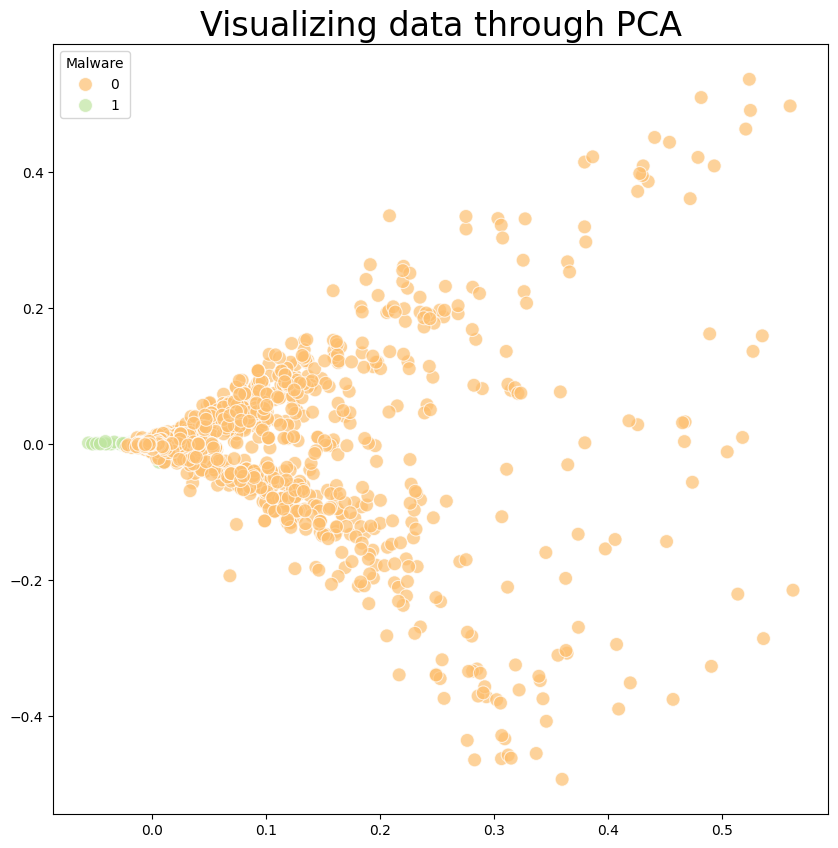

In [13]:
# EDIT THIS CELL
# ====================== Your code here =================
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_norm)
print(principalComponents.shape)



plt.figure(figsize=(10, 10))
g1 = sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=df['Malware'] , s=100, palette='Spectral', alpha=0.7)


plt.title('Visualizing data through PCA', fontsize=24)


# =======================================================

4. Assess then the effectiveness of your dimensionality reduction.

In [ ]:
# EDIT THIS CELL
# ====================== Your code here =================



# =======================================================

## 5. Clustering

Clustering is a collection of unsupervised Machine Learning algorithms in which parts of the data are grouped based on similarity. Clustering may be useful in cybersecurity for helping to classify malware into families. In this exercise, you will demonstrate how clustering performs on malware classification considereing the same previous dataset. 

1. Read and plot your data.

In [ ]:
# EDIT THIS CELL
# ====================== Your code here =================



# =======================================================

2. Extract then the features and the target labels. 

In [ ]:
# EDIT THIS CELL
# ====================== Your code here =================



# =======================================================

3. Import `sckit-learn's` clustering model and fit a `K-means` model with two clusters to the data.

In [ ]:
# EDIT THIS CELL
# ====================== Your code here =================



# =======================================================

4. Predict then clusters using the trained algorithm. Then plot the algorithm's output. Conclude. 

In [ ]:
# EDIT THIS CELL
# ====================== Your code here =================



# =======================================================